# PROJET PYTHON FINAL A3 

On import DataFrame et numpy

In [26]:
# storing and anaysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Fonction qui crée un DataFrame

In [2]:
data=pd.read_csv("./valeursfoncieres-2020.txt", sep="|",low_memory=False)
data.head()

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148.0


On commence le netoyage des données

In [3]:
#netoyage colonnes
column_with_nan = data.columns[data.isna().any()]
for column in column_with_nan:
    if data[column].isna().sum()*100.0/data.shape[0] > 50:
        data.drop(column,1, inplace=True)
uselesscolum = ['Section','No plan','Nombre de lots','Code type local','Nature culture','No voie','No disposition']
data.drop(uselesscolum,axis=1, inplace=True)
data

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
0,07/01/2020,Vente,"8000,00",NaN,B063,FORTUNAT,1250.0,CEYZERIAT,01,72,NaN,NaN,NaN,1061.0
1,02/01/2020,Vente,"2175,00",NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,01,203,NaN,NaN,NaN,85.0
2,02/01/2020,Vente,"2175,00",NaN,B006,BOIS DU CHAMP RION,1290.0,LAIZ,01,203,NaN,NaN,NaN,1115.0
3,02/01/2020,Vente,"2175,00",NaN,B025,EN COROBERT,1290.0,LAIZ,01,203,NaN,NaN,NaN,1940.0
4,02/01/2020,Vente,"2175,00",NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,01,203,NaN,NaN,NaN,1148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459555,16/12/2020,Vente,"1937500,00",RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,Appartement,87.0,4.0,447.0
2459556,16/12/2020,Vente,"1937500,00",RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,Dépendance,0.0,0.0,447.0
2459557,16/12/2020,Vente,"1937500,00",RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,Appartement,82.0,2.0,447.0
2459558,16/12/2020,Vente,"1937500,00",RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,Dépendance,0.0,0.0,447.0


In [4]:
#netoyage lignes
data = data.dropna(axis=0,thresh=14)

In [5]:
data["Valeur fonciere"] = data["Valeur fonciere"].str.replace(',','.')
data.head()

<ipython-input-5-ef533075e5b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Valeur fonciere"] = data["Valeur fonciere"].str.replace(',','.')


,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
13,06/01/2020,Vente,180300.00,RUE,0970,COMTE DE LA TEYSSONNIERE,1000.0,BOURG-EN-BRESSE,01,53,Maison,75.0,4.0,525.0
16,03/01/2020,Vente,350750.00,CHE,0149,DES GDES CADALLES,1000.0,SAINT-DENIS-LES-BOURG,01,344,Maison,201.0,7.0,1267.0
17,03/01/2020,Vente,350750.00,CHE,0149,DES GDES CADALLES,1000.0,SAINT-DENIS-LES-BOURG,01,344,Maison,201.0,7.0,1497.0
18,03/01/2020,Vente,350750.00,CHE,0149,DES GDES CADALLES,1000.0,SAINT-DENIS-LES-BOURG,01,344,Dépendance,0.0,0.0,1497.0
19,03/01/2020,Vente,350750.00,CHE,0149,DES GDES CADALLES,1000.0,SAINT-DENIS-LES-BOURG,01,344,Dépendance,0.0,0.0,1267.0


On convertie certaine colonnes en float

In [9]:
data["Valeur fonciere"] = pd.to_numeric(data["Valeur fonciere"])
data["Surface reelle bati"] = pd.to_numeric(data["Surface reelle bati"])
data["Code postal"] = data["Code postal"].astype({'Code postal': 'int32'})

<ipython-input-9-ccdba22efaa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Valeur fonciere"] = pd.to_numeric(data["Valeur fonciere"])
<ipython-input-9-ccdba22efaa5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Surface reelle bati"] = pd.to_numeric(data["Surface reelle bati"])
<ipython-input-9-ccdba22efaa5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [24]:
# On calcul le prix au metre carré de chaque commune
tempPrix = data.dropna()
tempPrix = tempPrix[(tempPrix["Surface terrain"]>0)]
tempPrix["Prix m2"] = (tempPrix["Valeur fonciere"] / tempPrix["Surface terrain"])
tmp = tempPrix.groupby(["Code departement"])["Valeur fonciere","Surface terrain","Prix m2"].mean()
tmp.style.background_gradient(cmap='Blues')

<ipython-input-24-238486042be7>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp = tempPrix.groupby(["Code departement"])["Valeur fonciere","Surface terrain","Prix m2"].mean()


,Valeur fonciere,Surface terrain,Prix m2
Code departement,,,
01,307093.833445,848.306101,897.639361
02,150156.404416,639.503600,615.104388
03,147610.986020,939.764346,472.165424
04,228390.870685,814.994590,1064.209115
05,315760.679790,603.837270,1276.309895
06,4130406.388620,1314.774650,3997.515680
07,191603.127499,850.479269,664.235733
08,136935.526889,3076.729021,661.265744
09,188810.321271,559.195024,793.943139


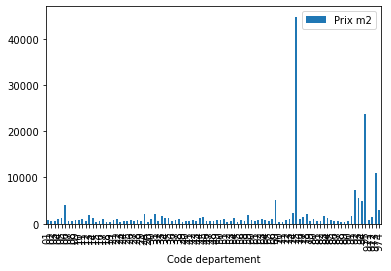

In [38]:
tmp['Code departement'] = tmp.index
tmp.plot.bar(x='Code departement',y='Prix m2')